<a href="https://colab.research.google.com/github/helloitsmimi/esaa/blob/master/15%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 `ch6. 4~5 pg. 396~408`을 필사

## 04. SVD(Singular Value Decomposition)
### SVD 개요
- 행, 열 크기 다른 행렬에도 적용 가능
- 희소행렬에도 적용 가능
- 특이값 분해
- $ A = U \sum V^T $
  - $U, V$ : 특이벡터(singular vector). 서로 직교
  - $\sum$ : 대각행렬. 대각성분 값이 행렬 $A$의 특이값
  - $A$의 차원이 $m \times n$일 때
    - $U$ : $m \times m$
    - $\sum$ : $m \times n$
    - $V^T$ : $n \times n$
    - 보통 $\sum$의 비대각 부분과 특이값인 부분 모두 제거 후 $\sum$에 대응되는 $U, V$ 값만 남긴 형태로 적용
  - **Truncated SVD** : 대각 원소 중 상위 몇 개만 추출하고, 대응하는 $U, V$의 원소도 함께 제거해 차원을 더욱 줄인 형태로 분해하는 것
  - `numpy`나 `사이파이 라이브러리` 이용

In [ ]:
# 넘파이의 SVD 이용해 SVD 연산 수행

# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4*4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
# a 행렬에 SVD 적용해 U, sigma, Vt 도출
# numpy.linalg.svd에 파라미터로 원본행렬 입력

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix :\n', np.round(U,3))
print('Sigma Value :\n', np.round(Sigma, 3))
print('V transpose matrix :\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix :
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value :
 [3.423 2.023 0.463 0.079]
V transpose matrix :
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
# 다시 원본 행렬로 복원 : 내적
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
# 데이터 세트 로우 간 의존성 있을 경우 Sigma 값 변화

# a 행렬 3번째 로우 : 1행 + 2행
# a 행렬 4번째 로우 = 1행
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


0 아닌 Sigma 값 2개 <br/>
= 선형 독립인 로우 벡터 수 : 2개 <br/>
= 행렬의 Rank가 2

In [ ]:
# Sigma의 0에 대응되는 U, Sigma, Vt 데이터 제외하고 행렬 복원

# U행렬 복원 
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2]) 

# V 전치 행렬 복원
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt 내적 수행해 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# Truncated SVD
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬 출력해 SVD 적용할 경우 U, Sigma, Vt 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 :\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원 :', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬 :', Sigma)

# Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원 :', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬 :', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print('\nTruncated SVD로 분해 후 다시 복원한 행렬 :\n', matrix_tr)

원본 행렬 :
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 : (6, 6) (6,) (6, 6)

Sigma값 행렬 : [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 : (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 : [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 다시 복원한 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- fit(), transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

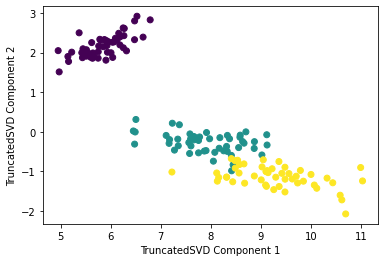

In [ ]:
# 붓꽃 데이터 세트를 TruncatedSVD로 변환

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TrunscatedSVD 변환된 데이터 시각화
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

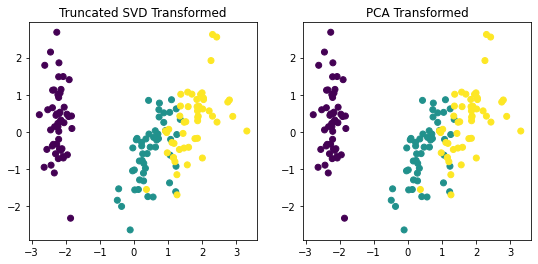

In [ ]:
# 스케일링 진행 후 변환하면 TruncatedSVD, PCA 결과 비슷 (둘다 SVD 이용)

from sklearn.preprocessing import StandardScaler 

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링 된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링 된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 시각화 : TruncatedSVD / SVD
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [ ]:
# 변환 행렬 값, 원복 속성별 컴포넌트 비율값 비교
print((iris_pca - iris_tsvd).mean())
print((pca.components_ -  tsvd.components_).mean())

2.3224709192840956e-15
2.7755575615628914e-17


둘다 0에 가까운 값 → 변환 거의 동일 <br/>
: 데이터 세트의 중심이 동일해지면 SVD, PCA는 동일한 변환 수행

## 05. NMF(Non-Negative Matrix Factorization
### NMF 개요
- 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- 원본 행렬 내 모든 원소 값이 0 이상인 경우, 양수 행렬 2개로 분해
- 분해된 행렬 : 잠재요소 가짐
  - $ V = W \times H $
  - $W$ : 원본 행에 대해서 잠재 요소의 값이 얼마나 되는지에 대응
  - $H$ 원본 열로 어떻게 구성되었는지 나타냄


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF component 2')

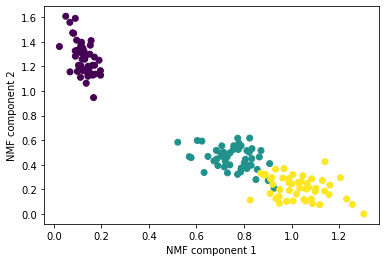

In [ ]:
# NMF로 붓꽃 데이터를 2개의 컴포넌트로 변환 후 시각화

from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')

## 06. 정리
- 차원 축소 의의 : 데이터를 잘 설명할 수 있는 잠재적인 요소 추출
- PCA : 변동 데이터 가장 큰 축에 직교하는 축을 축소 차원 개수만큼 구한 후 입력데이터를 축에 투영해 차원 축소
- 공분산 행렬로 고유벡터 생성 후 입력 데이터 선형 변환
- LDA : 입력 데이터의 결정값 클래스 최대한 분리할 수 있는 축 기준으로 차원 축소
- SVD, NMF